In [81]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

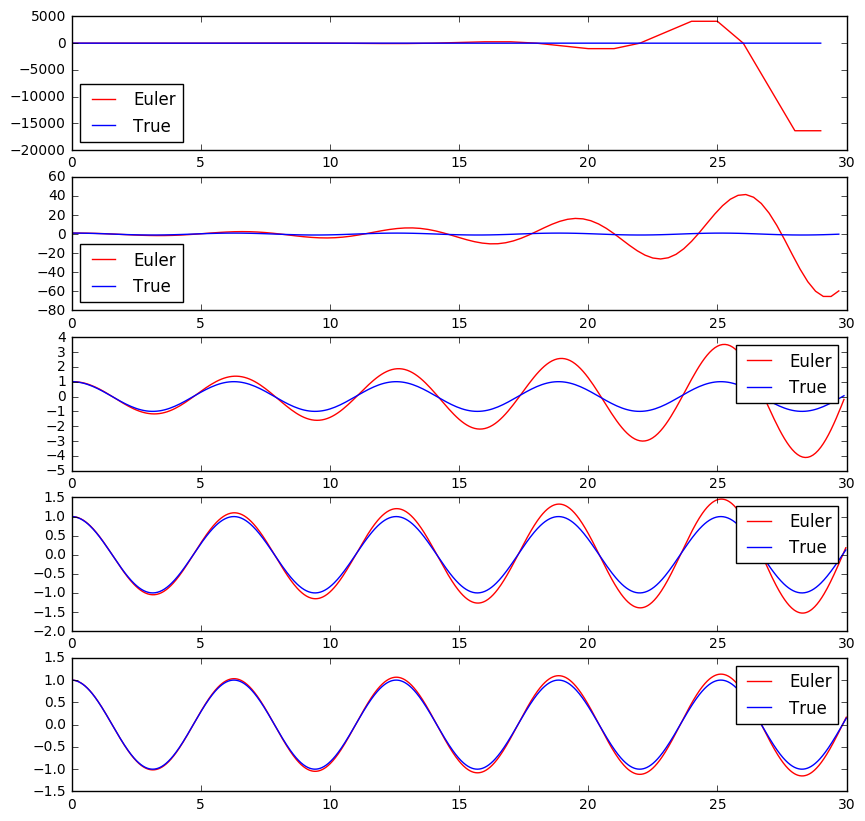

In [155]:
# define dydt
def f(A, B, C, y):
    '''
    Params:
    -------
    A, B, C, D = coefficients to 2nd order ODE, (A w/ d2xdt2, B w/ dxdt, C w/ x)
    y = list of values, y[0] = x(t), y[1] = x'(t)
    
    Outputs:
    --------
    dydt = list of values dydt[0] = x'(t), dydt[1] = x''(t)
    '''
    dydt = np.zeros(y.shape)
    dydt[0] = y[1]
    dydt[1] = ((-B/A)*y[1] - (C/A)*y[0])
    return dydt

def Euler(y0, dydt, t0, tf, h):
    '''
    Params:
    -------
    y0 = list of values y0[0] = x(t), y0[1] = x'(t)
    dydt = calculated above
    t0, tf = starting and ending time, respectively
    h = time step (also resolution)
    
    Output:
    -------
    
    '''
    global A, B, C
    t = np.arange(t0, tf, h)
    N = (tf - t0)/h
    n = 0 
    y = np.array([y0[0]])
    dy = np.array([y0[1]])
    while n<N-1:
        yn = y0 + dydt*h
        y = np.append(y, yn[0])
        dy = np.append(dy, yn[1])
        y0 = yn
        dydt = f(A,B,C,y0)
        n += 1 
        continue
    return y, t

# Function Coefficients
A = 1
B = 0
C = 1
    
# IC's
y0 = np.array([1,0])
dydt0 = f(A,B,C,y0)
t0 = 0
tf = 30

# Euler
h = np.array([1, 0.3, 0.1, 0.03, 0.01])
fig,ax = plt.subplots(h.shape[0])
fig.set_size_inches(10,10)
for idx,val in enumerate(h):
    y_new, t = Euler(y0, dydt0, t0, tf, val)
    tru = np.cos(t)
    ax[idx].plot(t, y_new, label='Euler', color='red')
    ax[idx].plot(t, tru, label='True', color = 'blue')
    ax[idx].legend(loc=0)
  

In [157]:
# Leap Frog
y0 = np.array([1,0])
dydt0 = f(A,B,C,y0)
t0 = 0
tf = 30
h = np.array([1, 0.3, 0.1, 0.03, 0.01])



In [156]:
def LeapFrog(y0, dydt, t0, tf, h):
    n = 0
    N = (tf-t0)/h
    t = np.arange(t0, tf, h)
    vi = np.array([dydt[0]])
    vh = np.array([])
    g = np.array([dydt[1]])
    x = np.array([y0[0]])
    while n < N-1:
        vh_n = vi[n] + g[n]*h/2
        vh = np.append(vh,vh_n)
        
        x_n = x[n] + h * vh[n]
        x = np.append(x, x_n)
        
        y_n = np.array([x_n, vh_n])
        yp_n = f(A, B, C, y_n)
        
        gn = yp_n[1]
        g = np.append(g, gn)
        
        vi_n = vh_n + g[n+1] * h/2
        vi = np.append(vi, vi_n)
        
        n += 1
        continue
    return x, t

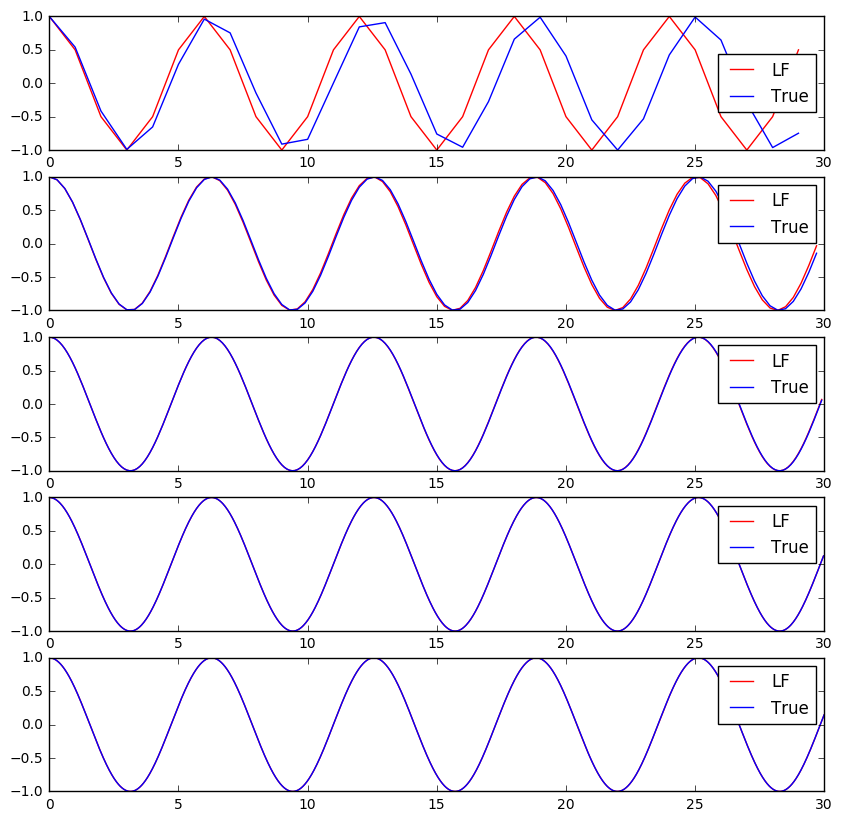

In [172]:
y0 = np.array([1,0])
dydt0 = f(A,B,C,y0)
t0 = 0
tf = 30
h = np.array([1, 0.3, 0.1, 0.03, 0.01])

fig,ax = plt.subplots(h.shape[0])
fig.set_size_inches(10,10)
for idx,val in enumerate(h):
    y_new, t = LeapFrog(y0, dydt0, t0, tf, val)
    tru = np.cos(t)
    ax[idx].plot(t, y_new, label='LF', color='red')
    ax[idx].plot(t, tru, label='True', color = 'blue')
    ax[idx].legend(loc=0)